<a href="https://colab.research.google.com/github/Angel-Oliva/2004927_IA_002-12206_A2024/blob/main/FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 6 - Artificial Neural Network: Feedforward

Team members:


*   Aguilar López Sebastián Eucebio #1975946
*   Garcia Lira Esdras #1995008
*   Martínez Gámez América de los Ángeles #1933618
*   Oliva Villarreal Angel #2004926

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8742 - loss: 0.4342 - val_accuracy: 0.9563 - val_loss: 0.1471
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9656 - loss: 0.1167 - val_accuracy: 0.9671 - val_loss: 0.1032
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9774 - loss: 0.0758 - val_accuracy: 0.9755 - val_loss: 0.0819
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9835 - loss: 0.0535 - val_accuracy: 0.9785 - val_loss: 0.0688
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9886 - loss: 0.0376 - val_accuracy: 0.9761 - val_loss: 0.0724


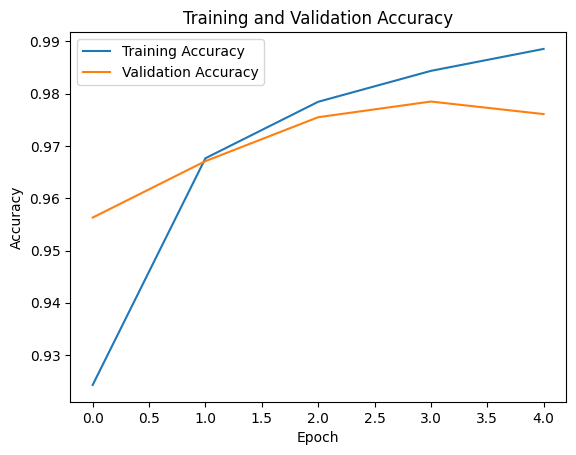

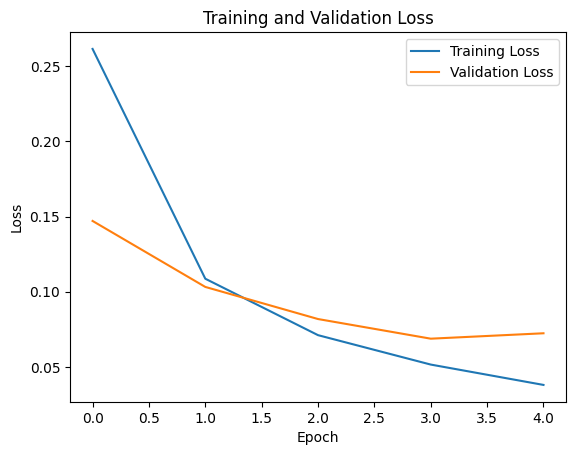

In [6]:
# Import

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Normalize the images
train_data = train_data.reshape((train_data.shape[0], 28 * 28)).astype('float32') / 255
test_data = test_data.reshape((test_data.shape[0], 28 * 28)).astype('float32') / 255

# Encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Model selection and training
model = Sequential([
    Input(shape=(28 * 28,)),
    Dense(512, activation='relu'),  # Ahora sin input_shape
    Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=5, batch_size=128, validation_data=(test_data, test_labels))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

*To train a Feedforward Neural Network model.*

1. Load libraries.

In [ ]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

2. Load data.

In [ ]:
# Load the data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


3. Data preprocessing.


In [ ]:
# Data preprocessing
# Normalize the data to a range of 0 to 1
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

# Convert labels to categorical format
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

4. Model selection and training.


In [ ]:
# Model selection and training
from keras.layers import Input

# Create the feedforward neural network model
model = Sequential()
model.add(Input(shape=(28, 28)))  # Use Input layer to define input shape
model.add(Flatten())                # Flatten the 28x28 images into a vector of 784 elements
model.add(Dense(128, activation='relu'))   # Hidden layer with 128 neurons and ReLU activation function
model.add(Dense(10, activation='softmax')) # Output layer with 10 neurons (one for each class)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8778 - loss: 0.4371
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9633 - loss: 0.1272
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9755 - loss: 0.0825
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9822 - loss: 0.0590
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9865 - loss: 0.0444


5. Model testing.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9714 - loss: 0.0902
Model Accuracy: 0.98
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: 7, Actual value: 7


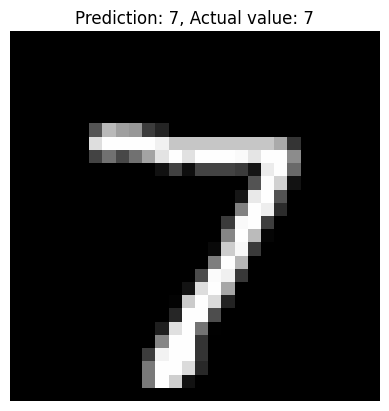

Prediction: 2, Actual value: 2


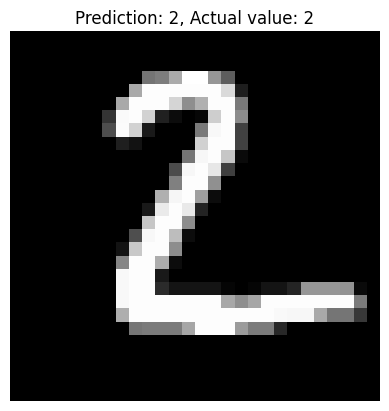

Prediction: 1, Actual value: 1


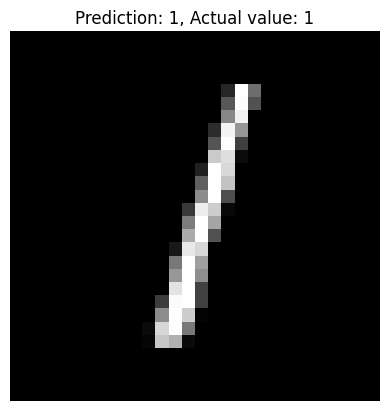

Prediction: 0, Actual value: 0


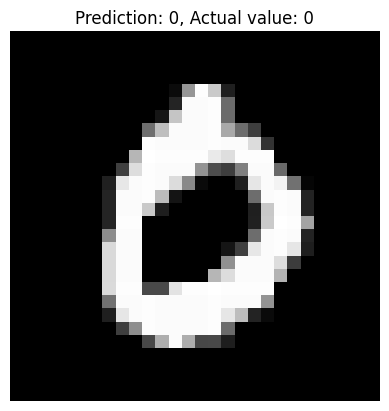

Prediction: 4, Actual value: 4


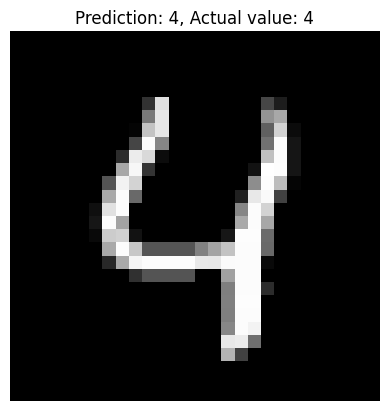

In [ ]:
# Model testing
# Evaluate the model's accuracy on the test set
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Model Accuracy: {test_accuracy:.2f}')

# Make 5 predictions with the test dataset
predictions = model.predict(test_data[:5])  # Predict the first 5 images

# Display predictions and actual values
for i in range(5):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(test_labels[i])
    print(f'Prediction: {predicted_label}, Actual value: {actual_label}')

    # Visualize the image
    plt.imshow(test_data[i], cmap='gray')
    plt.title(f'Prediction: {predicted_label}, Actual value: {actual_label}')
    plt.axis('off')
    plt.show()

# References:
*   Matthes, E. (2023). Python crash course. No starch press.
*   https://www.w3schools.com/python/default.asp
*   Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.
*   https://www.tensorflow.org/tutorials/keras/classification
